# Example 1

In this example, we evolve a single star (in the file [listSin.txt](listSin.txt) and we use the output to plot its track in the HR diagram. In addition we re-run SEVN using different stellar evolution tables. 

- To compile SEVN use the [compile.sh](compile.sh) script
- The basic run script is [run_sse.sh](run_sse.sh) or [run_sse_parsecov05.sh](run_sse_parsecov05.sh)
- To run the alterative parsec table [run_sse_parsecov04.sh](run_sse_parsecov04.sh)
- To run using the MIST stellar tables: [run_sse_mist.sh](run_sse_mist.sh) (remember to set use tabuse_rhe=false, tabuse_rco=false, tabuse_envconv=false)

Remember to set the proper SEVN path in the compile and run scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("sevn_output/output_0.csv")

df.describe()

ID          name   Worldtime        Mass         MHE         MCO  \
count  368.0  3.680000e+02  368.000000  368.000000  368.000000  368.000000   
mean     0.0  9.782348e+14    9.043854   16.476458    5.160985    0.491379   
std      0.0  0.000000e+00    1.073503    1.376936    1.823392    1.111120   
min      0.0  9.782348e+14    0.000000    1.557675    0.000000    0.000000   
25%      0.0  9.782348e+14    8.955552   14.928330    5.094966    0.000000   
50%      0.0  9.782348e+14    9.181940   17.081275    6.065364    0.000000   
75%      0.0  9.782348e+14    9.641534   17.469815    6.359905    0.000000   
max      0.0  9.782348e+14    9.663522   17.994540    6.369764    4.033711   

            Radius     Luminosity   Temperature       Phase  RemnantType  
count   368.000000     368.000000  3.680000e+02  368.000000   368.000000  
mean    383.611876   96669.766162  1.581404e+04    3.578804     0.013587  
std     363.059931   19734.912018  9.670444e+04    1.252479     0.260643  
min       0.000016       2.687496  3.279036e+03    1.000000     0.000000  
25%      37.076440   86538.972500  3.512002e+03    3.000000     0.000000  
50%     225.118350   97605.630000  6.898702e+03    4.000000     0.000000  
75%     843.854550  106635.925000  1.656943e+04    4.250000     0.000000  
max    1244.296000  161259.800000  1.858567e+06    7.000000     5.000000

(100000.0, 1000.0)

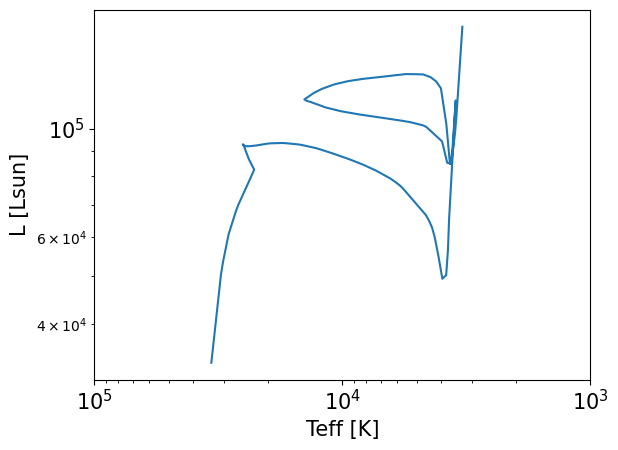

In [7]:
df=pd.read_csv("sevn_output/output_0.csv")

df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Teff [K]",fontsize=15)
plt.ylabel("L [Lsun]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1e5,1e3)

(100000.0, 1000.0)

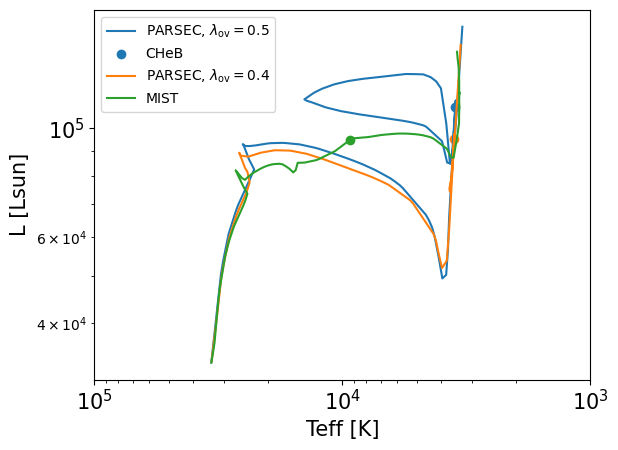

In [6]:
df=pd.read_csv("sevn_output_parsecov05/output_0.csv")
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="PARSEC, $\lambda_\mathrm{ov}=0.5$")

CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity,label="CHeB")


plt.xscale("log")
plt.yscale("log")
plt.xlim(1e5,1e3)


df=pd.read_csv("sevn_output_parsecov04/output_0.csv")
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="PARSEC, $\lambda_\mathrm{ov}=0.4$")
CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e5,1e3)

df=pd.read_csv("sevn_output_mist/output_0.csv")
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="MIST")
CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Teff [K]",fontsize=15)
plt.ylabel("L [Lsun]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(1e5,1e3)
